In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from glob import glob
from scipy import stats  
import seaborn as sns
import statsmodels.api as sm

In [2]:
files = glob("../csv/演習問題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/演習問題_データアナリティクス基礎\第10章演習問題_乱数で発生させて分布の基本統計量.xlsx
1 ../csv/演習問題_データアナリティクス基礎\第2章演習問題_クレームデータ.xlsx
2 ../csv/演習問題_データアナリティクス基礎\第3章演習問題_職場ストレス.xlsx
3 ../csv/演習問題_データアナリティクス基礎\第4章演習問題_児童のネット利用時間.xlsx
4 ../csv/演習問題_データアナリティクス基礎\第5章演習問題_生鮮野菜の購入額.xlsx
5 ../csv/演習問題_データアナリティクス基礎\第7章演習問題_授業効果の検証.xlsx
6 ../csv/演習問題_データアナリティクス基礎\第8章演習問題1_健康食品・化粧品販売額.xlsx
7 ../csv/演習問題_データアナリティクス基礎\第8章演習問題2_百貨店の衣料品売上高.xlsx
8 ../csv/演習問題_データアナリティクス基礎\第9章演習問題_自由記述データ＆形態素解析データ.xlsx


In [3]:
df = pd.read_excel(files[4])
print(df.columns)
# df.columns = ['id', 'volume', 'population', 'cabbage', 'spinach', 'chinese_cabbage', 'green_onion', 'lettuce']
df.info()
df.head()

Index(['地域ID', '面積（㎢）', '人口（人）', 'キャベツ（円）', 'ほうれんそう（円）', 'はくさい（円）', 'ねぎ（円）',
       'レタス（円）'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   地域ID       52 non-null     int64  
 1   面積（㎢）      52 non-null     float64
 2   人口（人）      52 non-null     int64  
 3   キャベツ（円）    52 non-null     int64  
 4   ほうれんそう（円）  52 non-null     int64  
 5   はくさい（円）    52 non-null     int64  
 6   ねぎ（円）      52 non-null     int64  
 7   レタス（円）     52 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 3.4 KB


,地域ID,面積（㎢）,人口（人）,キャベツ（円）,ほうれんそう（円）,はくさい（円）,ねぎ（円）,レタス（円）
0,1,886.47,275192,3348,3222,1244,2925,2128
1,2,437.71,3777491,3370,2585,1360,3891,3082
2,3,1241.74,262328,3247,2813,1499,3018,2456
3,4,627.63,9733276,3124,2479,1346,4072,3256
4,5,271.78,332149,2978,2752,1332,3786,2991


面積と人口の相関係数: 0.03

In [4]:
df[['面積（㎢）', '人口（人）']].corr()

,面積（㎢）,人口（人）
面積（㎢）,1.000000,0.032603
人口（人）,0.032603,1.000000


レタスとキャベツの散布図 : 1

c:\Users\jy810251\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


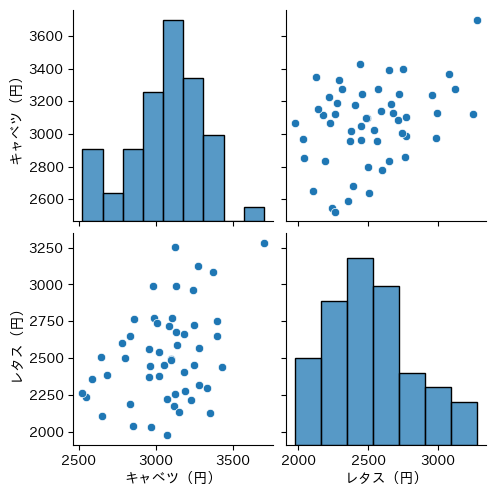

In [24]:
columns = [
    "キャベツ（円）",
    # "ほうれんそう（円）",
    # "はくさい（円）",
    # "ねぎ（円）",
    "レタス（円）",
]
sns.pairplot(df[columns])
plt.show()

人口密度を従属変数、レタスの購入金額を独立変数とした回帰分析
- レタスの購入金額が1円上がると、人口密度は 4.92 人上昇する

In [62]:
y = df['人口（人）'] / df['面積（㎢）']
x = df['レタス（円）']
X = sm.add_constant(x)
result = sm.OLS(y, X).fit()
# print(result.summary().tables[0])
# print(result.summary().tables[1])
# print(result.summary().tables[2])
print(result.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.228
No. Observations:                  52   F-statistic:                     16.05
Covariance Type:            nonrobust   Prob (F-statistic):           0.000205
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.02e+04   3115.399     -3.273      0.002   -1.65e+04   -3940.203
レタス（円）         4.9167      1.227      4.007      0.000       2.452       7.381

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.


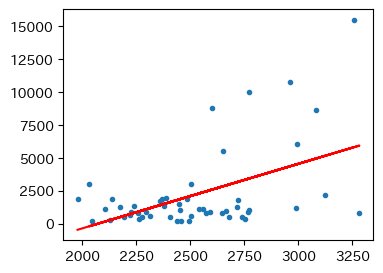

In [77]:
plt.figure(figsize=(4, 3))
plt.scatter(x, y, marker='.')
y_hat = result.fittedvalues
plt.plot(x, y_hat, color='r')

レタスが3000円の時の人口密度の予測値: 4552.34 円

In [69]:
x_1 = 3000
y_1 = result.params[0] + result.params[1] * x_1
print(f'{y_1:.02f}')

4552.34


もっとも残差が大きい地域ID: 4

In [88]:
df['error'] = (y - y_hat)
df.sort_values(by='error', ascending=False).head()

,地域ID,面積（㎢）,人口（人）,キャベツ（円）,ほうれんそう（円）,はくさい（円）,ねぎ（円）,レタス（円）,error
3,4,627.63,9733276,3124,2479,1346,4072,3256,9696.977664
25,26,41.42,413938,3106,1995,1208,2490,2773,6557.418979
6,7,143.01,1538262,3239,2280,1307,3703,2962,6390.818859
41,42,311.59,2752412,2781,1640,974,2402,2602,6237.936078
1,2,437.71,3777491,3370,2585,1360,3891,3082,3674.616620


In [71]:
result.predict()

array([ 265.00455352, 4955.50606358, 1877.67173936, 5811.006339  ,
       4508.08925287, 2974.08875901, 4365.50587363, 5162.00613006,
       2915.08874002, 3185.50549374, 4513.00592112, 3151.088816  ,
       2300.50520883, 1803.92171562,  501.00462949,  584.58798974,
       5938.83971348, 2448.00525631, 3342.83887773, 3431.33890622,
       3396.92222847, 2108.75514709, -202.07893019, 2536.5052848 ,
       1636.75499514, 3436.25557447, 1499.08828415,  810.75472921,
       1843.25506162, 2831.50537978, -147.99557945, 2393.92190557,
       2064.50513285, 3278.92219048, 1548.25496665,  746.83804197,
        923.83809895, 2821.67204328, 1189.33818443, 1400.75491916,
       1454.8382699 , 2595.5053038 ,  314.17123601, 1086.08815119,
       2020.2551186 ,  987.7547862 , 1858.00506637,  156.83785203,
        914.00476246,  717.33803247, 2118.58848359, -467.57901567])